<a href="https://colab.research.google.com/github/vladcioaba/vault/blob/main/SimilaritySearchInTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
import os 
import glob
path = os.getcwd() + '/data/'
print(path)

if not os.path.exists(path):
  os.mkdir(path) 

uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
  with open(path + fn, 'wb') as f:
    f.write(uploaded[fn])
    f.close()


/content/data/


Saving AAPL.csv to AAPL.csv
User uploaded file "AAPL.csv" with length 18530 bytes


In [2]:
!git clone https://github.com/tylerwmarrs/mass-ts.git && cd mass-ts && pip install -r requirements.txt
%cd mass-ts

Cloning into 'mass-ts'...
remote: Enumerating objects: 205, done.
remote: Total 205 (delta 0), reused 0 (delta 0), pack-reused 205
Receiving objects: 100% (205/205), 75.44 KiB | 2.90 MiB/s, done.
Resolving deltas: 100% (97/97), done.
     |████████████████████████████████| 17.4MB 266kB/s 
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.16.6 which is incompatible.
ERROR: tensorflow 2.4.0 has requirement numpy~=1.19.2, but you'll have numpy 1.16.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
/content/mass-ts


In [4]:
files = glob.glob(path + "*.csv")
print('Loading ' + str(files))

series = []
for file in files:
  data = pd.read_csv(file)
  data['Avg'] = data['Open'] + (data['High'] - data['Low']) / 2
  series.append(data)

Loading ['/content/data/AAPL.csv']


253
10


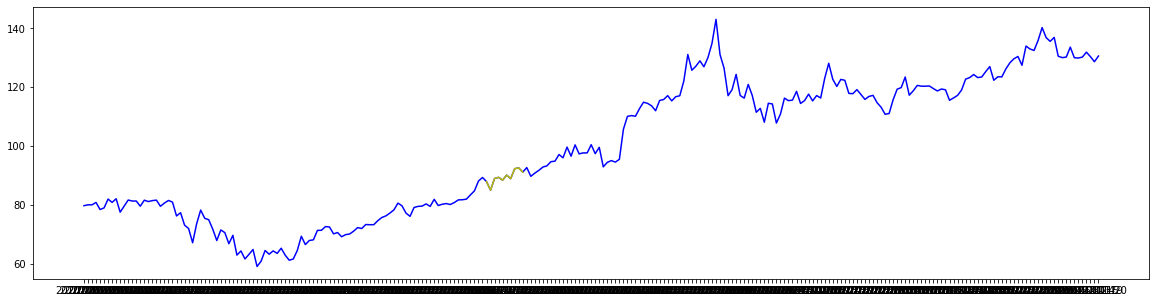

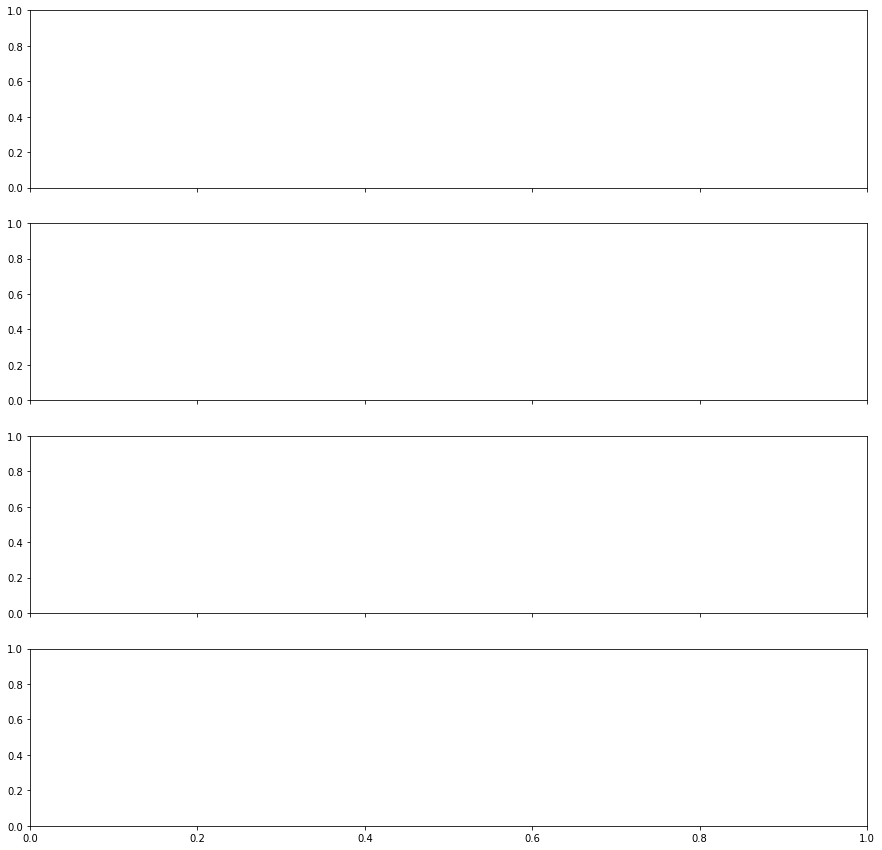

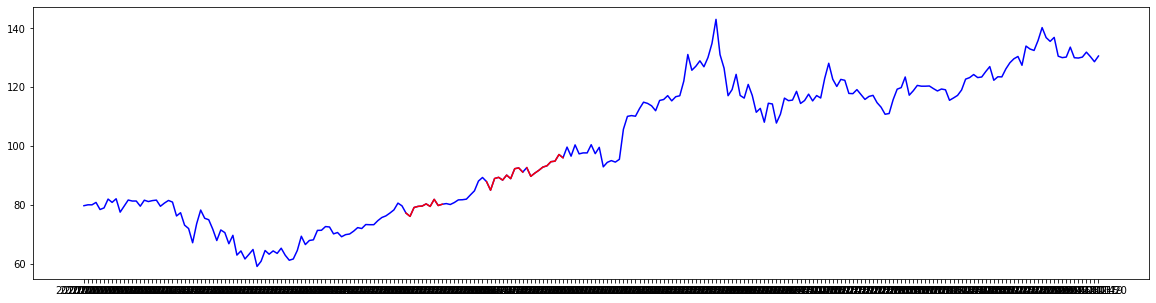

<Figure size 432x288 with 0 Axes>

In [10]:
import numpy as np
import mass_ts as mts
import matplotlib.pyplot as plt

#ts = np.loadtxt('tests/robot_dog.txt')
print(len(series[0]))
query = list(series[0][100:110]['Avg'].values)

batch_size = len(query)
print(batch_size)
top_matches = 3
n_jobs = -1

for data in series:
  #print(data.head())
  

  # mass
  #distances = mts.mass(ts, query)
  # mass2
  #distances = mts.mass2(ts, query)
  # mass3
  #distances = mts.mass3(ts, query, 256)

  ts = list(data['Avg'].values)

  indices, distances = mts.mass2_batch(ts, query, batch_size, top_matches, n_jobs)
  # print(indices)
  # print(distances)

  # find minimum distance
  #min_idx = np.argmin(distances)

  # find top 4 motif starting indices
  # k = 4
  # exclusion_zone = 25
  # top_motifs = mts.top_k_motifs(distances, k, exclusion_zone)

  # find top 4 discord starting indices
  # k = 4
  # exclusion_zone = 25
  # top_discords = mts.top_k_discords(distances, k, exclusion_zone)

  
  plt.figure(figsize=(20,5))
  plt.plot(data['Date'], data['Avg'], 'b')
  plt.plot(series[0][100:110]['Date'], series[0][100:110]['Avg'], 'y')
  plt.show()

  fig, axes = plt.subplots(top_matches + 1,1,sharex=True,figsize=(15,15))
  
  plt.figure(figsize=(20,5))
  plt.plot(data['Date'], data['Avg'], 'b')
  for ax, idx, in zip(axes[1:], indices):
    idx:idx+len(query)
    plt.plot(data[idx:idx+len(query)]['Date'], data[idx:idx+len(query)]['Avg'], 'r')
  plt.show()

  axes[0].plot(np.arange(len(query)), query)
  axes[0].set_ylabel('Ref', size=10)

  for ax, idx in zip(axes[1:], indices):
     ax.plot(np.arange(len(query)), ts[idx:idx+len(query)])
     ax.set_ylabel('{}'.format(idx), size=10)

  plt.suptitle('Top {} Matches'.format(len(indices)))
  plt.show()